In [1]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
flist = sorted(os.listdir('mcts/data/mcts-0724_0501/scene-0'))
img_path = os.path.join('mcts/data/mcts-0724_0501/scene-0', 'nv_top_final.png')
seg_path = os.path.join('mcts/data/mcts-0724_0501/scene-0', 'top_seg_final_nv.png')

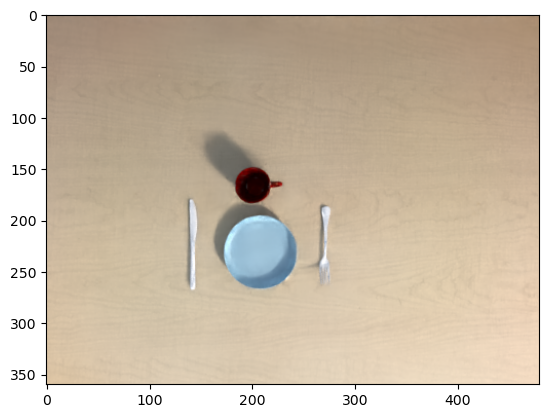

In [3]:
x = cv2.imread(img_path)
plt.imshow(x[:, :, ::-1])

In [4]:
seg = cv2.imread(seg_path)
segment_colors = np.vstack({tuple(r) for r in seg.reshape(-1,3)})

segmasks = []
for sc in segment_colors:
    mask = np.all(seg==sc, axis=2)
    if mask.sum() > 100000:
        continue
    segmasks.append(mask)

/var/folders/fq/b300sbn12pb57ml4dcrtljvc0000gn/T/ipykernel_58644/1643196214.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  segment_colors = np.vstack({tuple(r) for r in seg.reshape(-1,3)})


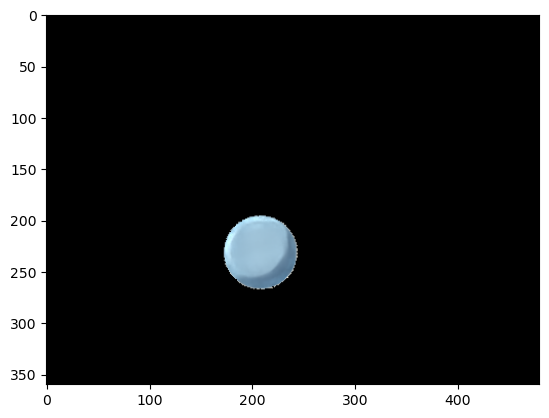

In [5]:
plt.imshow(x[:, :, ::-1] * mask[:, :, None])

In [43]:
mask = segmasks[1]

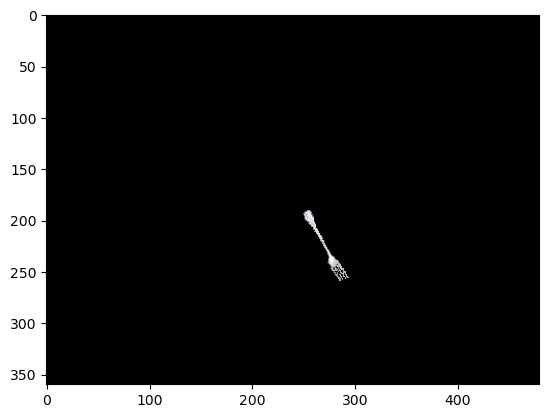

In [63]:
theta = 30
py, px = np.where(mask)
cy = int(np.round(np.mean(py)))
cx = int(np.round(np.mean(px)))
# cy, cx = np.round([np.mean(py), np.mean(px)]).astype(np.uint8)
M = cv2.getRotationMatrix2D((cx, cy), theta, 1.0)
img_rotated = cv2.warpAffine(x, M, (x.shape[1], x.shape[0]))
seg_rotated = cv2.warpAffine(mask.astype(np.uint8), M, (x.shape[1], x.shape[0]))
plt.imshow(img_rotated[:,:,::-1]*seg_rotated[:,:,None])

In [140]:
def transform_objpatch(image, mask, translate=(0,0), theta=0):
    mask = mask.astype(np.uint8)
    H, W, _ = image.shape
    tx, ty = translate
    if tx > 0:
        image = cv2.copyMakeBorder(image[:, :-tx],0,0,tx,0,cv2.BORDER_CONSTANT,None,value=0)
        mask = cv2.copyMakeBorder(mask[:, :-tx],0,0,tx,0,cv2.BORDER_CONSTANT,None,value=0)
    elif tx < 0:
        image = cv2.copyMakeBorder(image[:, -tx:],0,0,0,-tx,cv2.BORDER_CONSTANT,None,value=0)
        mask = cv2.copyMakeBorder(mask[:, -tx:],0,0,0,-tx,cv2.BORDER_CONSTANT,None,value=0)
        
    if ty > 0:
        image = cv2.copyMakeBorder(image[ty:, :],0,ty,0,0,cv2.BORDER_CONSTANT,None,value=0)
        mask = cv2.copyMakeBorder(mask[ty:, :],0,ty,0,0,cv2.BORDER_CONSTANT,None,value=0)        
    elif ty < 0:
        image = cv2.copyMakeBorder(image[:ty, :],-ty,0,0,0,cv2.BORDER_CONSTANT,None,value=0)
        mask = cv2.copyMakeBorder(mask[:ty, :],-ty,0,0,0,cv2.BORDER_CONSTANT,None,value=0)
    
    py, px = np.where(mask)
    cy = int(np.round(np.mean(py)))
    cx = int(np.round(np.mean(px)))
    M = cv2.getRotationMatrix2D((cx, cy), theta, 1.0)
    img_rotated = cv2.warpAffine(image, M, (W, H)).astype(int)
    seg_rotated = cv2.warpAffine(mask, M, (W, H)).astype(int)
    #plt.imshow(img_rotated[:,:,::-1]*seg_rotated[:,:,None])
    #plt.show()
    return img_rotated, seg_rotated

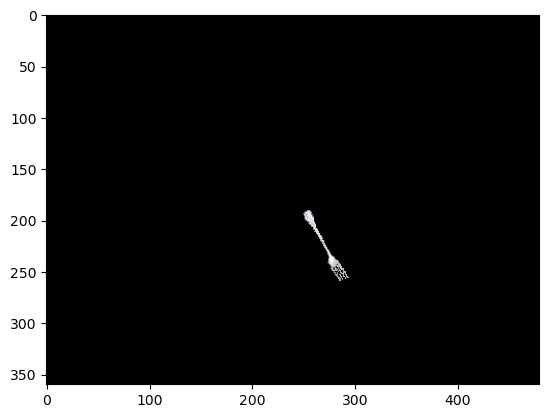

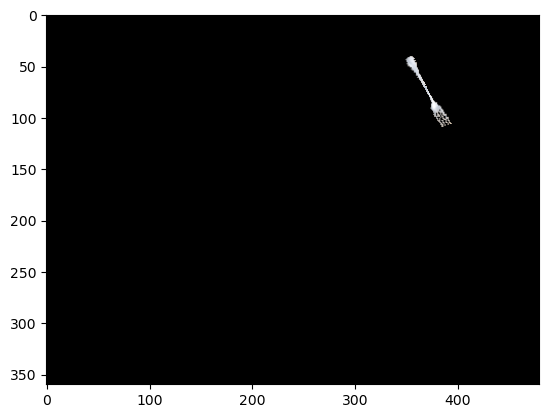

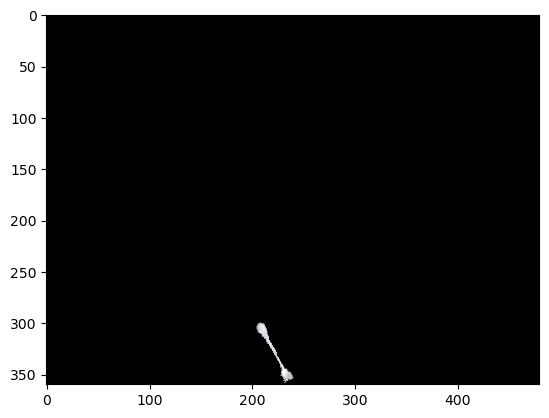

(array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[142, 168, 184],
         [142, 168, 184],
         [143, 169, 186],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[142, 168, 184],
         [142, 168, 185],
         [143, 169, 186],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[142, 168, 184],
         [142, 168, 185],
         [144, 171, 187],
         ...,
         [  0,   0,   0],
  

In [94]:
transform_objpatch(x, mask, theta=30)
transform_objpatch(x, mask, translate=[100, 150], theta=30)
transform_objpatch(x, mask, translate=[-50, -110], theta=30)

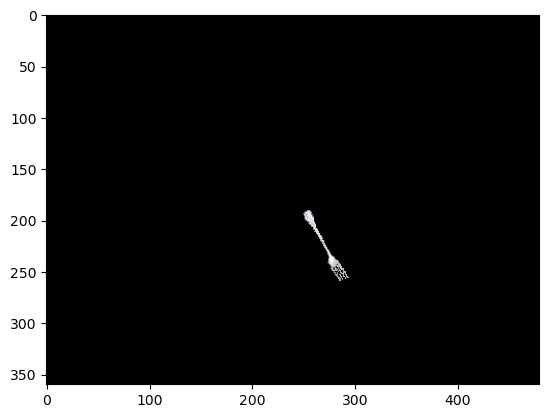

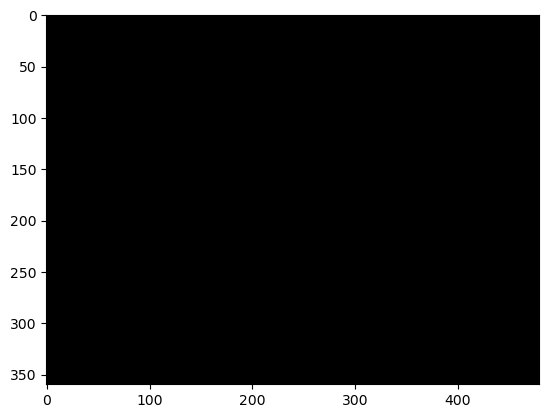

In [107]:
empty_image = np.zeros_like(x).astype(int) #np.ones_like(x) * 100
img_rotated, seg_rotated = transform_objpatch(x, mask, theta=30)

empty_image[seg_rotated] = img_rotated[seg_rotated]
plt.imshow(empty_image[:,:,::-1])

In [111]:
450%360

90

In [129]:
img_rotated[seg_rotated]

array([[[[150, 177, 196],
         [151, 178, 197],
         [153, 180, 200],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[150, 177, 196],
         [151, 178, 197],
         [153, 180, 200],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[150, 177, 196],
         [151, 178, 197],
         [153, 180, 200],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[150, 177, 196],
         [151, 178, 197],
         [153, 180, 200],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[150, 177, 196],
         [151, 178, 197],
         [153, 180, 200],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[150, 177, 196],
         [151, 178, 197],
         [153, 180, 200],
         ...,
         [  0,   0,   0],
        

In [135]:
img_rotated[seg_rotated]

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [151]:
empty_image.shape

(360, 480, 3)

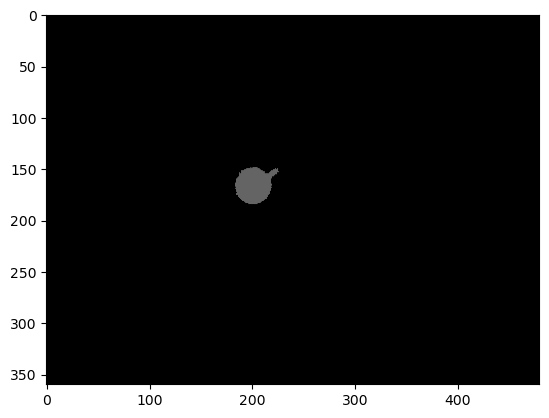

In [163]:
plt.imshow(empty_image * seg_rotated[:,:,None])

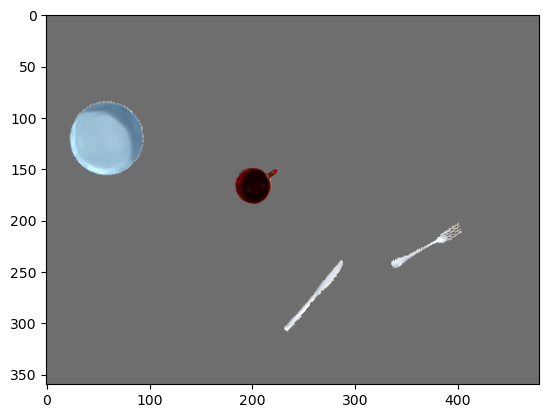

In [182]:
empty_image = np.ones_like(x).astype(int) * 110
# empty_image = np.zeros_like(x).astype(int)

translations = [[0, 0], [100, 0], [120, -50], [-150, 110]]
rotations = [30, 120, 320, 450]
for i, mask in enumerate(segmasks):
    translation = translations[i]
    theta = rotations[i]
    img_rotated, seg_rotated = transform_objpatch(x, mask, translate=translation, theta=theta)
    empty_image[seg_rotated==1] = img_rotated[seg_rotated==1]
plt.imshow(empty_image[:,:,::-1])

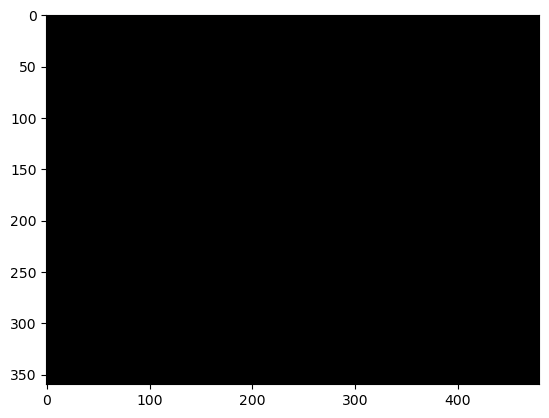

In [121]:
plt.imshow(empty_image.astype(int))